### This notebook implements :
1. Perceptron fitting on data of skl California housing.
2. Investigation of NN weights distribution after fitting.
3. Varying 1 NN weight and viewing Error value dependence.
4. Realisation Weights2Chrom() and Chrom2Weights() for GA.

Functions from 4-th tip is copied to PhenGen_transform.py

In [15]:
import numpy as np
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

In [2]:
housing_datasets = fetch_california_housing()
print(housing_datasets.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
df = pd.DataFrame(housing_datasets['data'], columns = housing_datasets['feature_names'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
pd.DataFrame(housing_datasets['target'], columns = housing_datasets['target_names'])

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [5]:
#sns.pairplot(df)

## Scaling data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(housing_datasets.data, housing_datasets.target, test_size=0.1, 
                                                    random_state = 42)

In [8]:
x_train.shape, x_test.shape

((18576, 8), (2064, 8))

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
#x_validation = scaler.transform(x_validation)
x_test = scaler.transform(x_test)

## Model - MLP

In [10]:
model = MLPRegressor(hidden_layer_sizes=(16), random_state=42, activation='tanh', solver='adam',
                    early_stopping=True, validation_fraction=2/7, n_iter_no_change=100,
                    max_iter=1000, warm_start = False)

# Обучение модели на тренировочных данных
model.fit(x_train, y_train)

MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=16,
             max_iter=1000, n_iter_no_change=100, random_state=42,
             validation_fraction=0.2857142857142857)

In [11]:
model.fit(x_train, y_train)

MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=16,
             max_iter=1000, n_iter_no_change=100, random_state=42,
             validation_fraction=0.2857142857142857)

Среднеквадратичная ошибка: 0.2913746791536197
R2: 0.7811387532335334


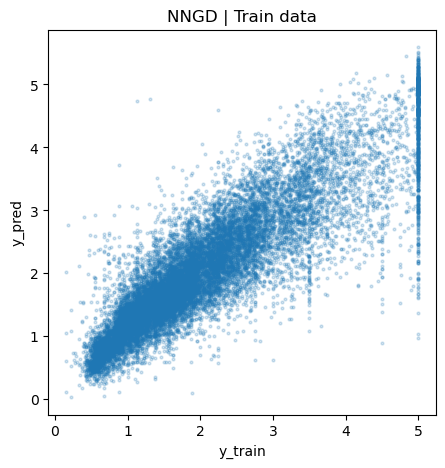

In [16]:
# Прогнозирование на Тренировочных данных
y_pred = model.predict(x_train)


# Оценка качества модели (среднеквадратичная ошибка)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Среднеквадратичная ошибка: {mse}")
print(f"R2: {r2}")
fig, ax = plt.subplots(figsize=(5,5))

plt.plot(y_train, y_pred, 'o', markersize=2, alpha = 0.2) 
ax.set_title("NNGD | Train data")
ax.set_xlabel("y_train")
ax.set_ylabel("y_pred")

plt.show()

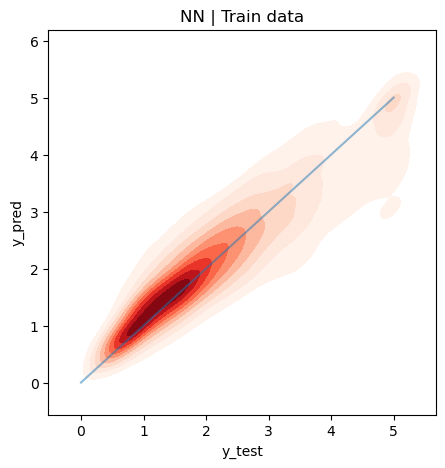

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.kdeplot(x=y_train, y=y_pred, cmap="Reds", fill=True, alpha = 1)
plt.plot([0, 5], [0,5], markersize=2, alpha = 0.5) 
ax.set_title("NN | Train data")

ax.set_xlabel("y_test")
ax.set_ylabel("y_pred")

plt.show()

Среднеквадратичная ошибка: 0.3147050225425988
R2: 0.7640200851562011


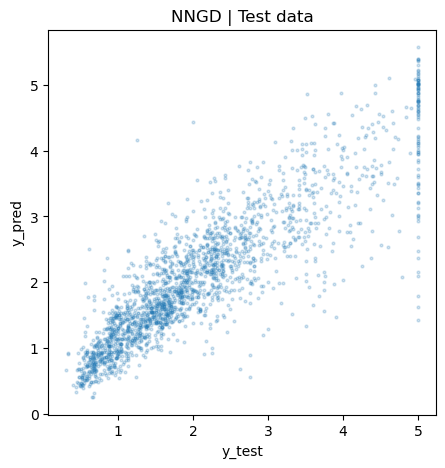

In [18]:
# Прогнозирование на Тестовых данных
y_pred = model.predict(x_test)


# Оценка качества модели (среднеквадратичная ошибка)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка: {mse}")
print(f"R2: {r2}")

fig, ax = plt.subplots(figsize=(5,5)) 

plt.plot(y_test, y_pred, 'o', markersize=2, alpha = 0.2)
ax.set_title("NNGD | Test data")
ax.set_xlabel("y_test")
ax.set_ylabel("y_pred")

plt.show()

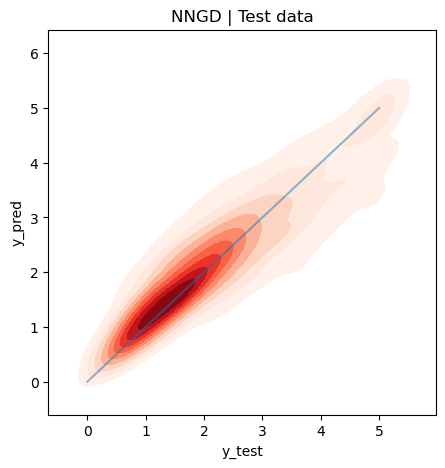

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.kdeplot(x=y_test, y=y_pred, cmap="Reds", fill=True, alpha = 1)
plt.plot([0, 5], [0,5], markersize=2, alpha = 0.5) 

ax.set_title("NNGD | Test data")
ax.set_xlabel("y_test")
ax.set_ylabel("y_pred")

plt.show()